In [202]:
import warnings
warnings.filterwarnings('ignore')


In [203]:
from nba_api.stats.endpoints import playercareerstats as pcs
from nba_api.stats.static import teams
from nba_api.stats.static import players
import pandas as pd
import json
import time
import requests
from pprint import pprint
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from scipy import stats


In [204]:
nba_teams = teams.get_teams()
rockets = [team for team in nba_teams if team['abbreviation'] == 'HOU'][0]
rockets_id = rockets['id']
thunder = [team for team in nba_teams if team['abbreviation'] == 'OKC'][0]
thunder_id = thunder['id']

In [205]:
from nba_api.stats.endpoints import playergamelog as pgl
rw = pgl.PlayerGameLog(player_id='201566', season = '2018-19').get_data_frames()[0]
rw["PTS/48"] = (rw["PTS"]/rw["MIN"])*48
rw["TS"] = (rw['PTS'])/(2.0*(rw['FGA']+(0.44*rw['FTA'])))

In [206]:
cp = pgl.PlayerGameLog(player_id='101108', season = '2018-19').get_data_frames()[0]
cp["PTS/48"] = (rw["PTS"]/rw["MIN"])*48
cp["TS"] = (cp['PTS'])/(2.0*(cp['FGA']+(0.44*cp['FTA'])))
cp.count()

SEASON_ID          58
Player_ID          58
Game_ID            58
GAME_DATE          58
MATCHUP            58
WL                 58
MIN                58
FGM                58
FGA                58
FG_PCT             58
FG3M               58
FG3A               58
FG3_PCT            58
FTM                58
FTA                58
FT_PCT             58
OREB               58
DREB               58
REB                58
AST                58
STL                58
BLK                58
TOV                58
PF                 58
PTS                58
PLUS_MINUS         58
VIDEO_AVAILABLE    58
PTS/48             58
TS                 58
dtype: int64

In [207]:
from nba_api.stats.endpoints import leaguegamefinder
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=rockets_id)
rockets_games = gamefinder.get_data_frames()[0]

thunder_gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=thunder_id)
thunder_games = thunder_gamefinder.get_data_frames()[0]

In [208]:
cp_merge = cp.merge(rockets_games,left_on='Game_ID',right_on='GAME_ID',how = 'left')
rw_merge = rw.merge(thunder_games,left_on='Game_ID',right_on='GAME_ID',how = 'left')
rw_merge.count()

SEASON_ID_x          73
Player_ID            73
Game_ID              73
GAME_DATE_x          73
MATCHUP_x            73
WL_x                 73
MIN_x                73
FGM_x                73
FGA_x                73
FG_PCT_x             73
FG3M_x               73
FG3A_x               73
FG3_PCT_x            73
FTM_x                73
FTA_x                73
FT_PCT_x             73
OREB_x               73
DREB_x               73
REB_x                73
AST_x                73
STL_x                73
BLK_x                73
TOV_x                73
PF_x                 73
PTS_x                73
PLUS_MINUS_x         73
VIDEO_AVAILABLE      73
PTS/48               73
TS                   73
SEASON_ID_y          73
TEAM_ID              73
TEAM_ABBREVIATION    73
TEAM_NAME            73
GAME_ID              73
GAME_DATE_y          73
MATCHUP_y            73
WL_y                 73
MIN_y                73
PTS_y                73
FGM_y                73
FGA_y                73
FG_PCT_y        

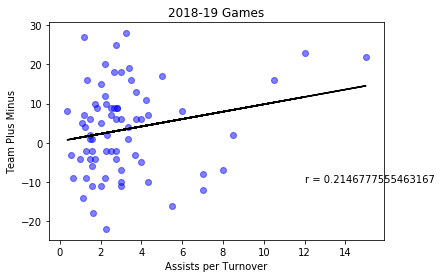

In [209]:
x = (rw_merge['AST_x']/rw_merge['TOV_x'])
y = rw_merge['PLUS_MINUS_y']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
predict_y = intercept + slope * x
plt.plot(x, predict_y,'black')
plt.scatter(x,y, color = 'blue',alpha=0.5)
plt.xlabel("Assists per Turnover")
plt.ylabel("Team Plus Minus")
plt.title("2018-19 Games")
plt.annotate(f'r = {r_value}',xy=(12,-10))
plt.savefig("RW ast per tov vs team+-.png")
plt.show()
plt.close()

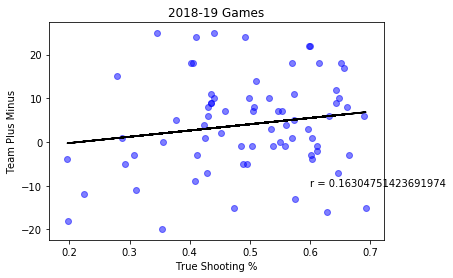

In [210]:
x = rw_merge['TS']
y = rw_merge['PLUS_MINUS_x']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
predict_y = intercept + slope * x
plt.plot(x, predict_y, 'black')
plt.scatter(x,y, color = 'blue',alpha=0.5)
plt.xlabel("True Shooting %")
plt.ylabel("Team Plus Minus")
plt.title("2018-19 Games")
plt.annotate(f'r = {r_value}',xy=(.6,-10))
plt.savefig("RW TS% vs team+-.png")
plt.show()

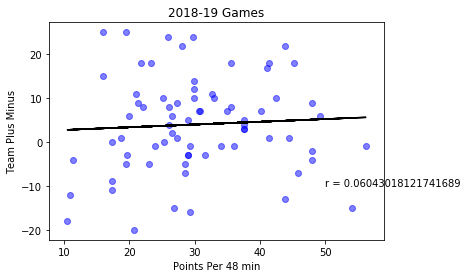

In [134]:
x = rw_merge['PTS/48']
y = rw_merge['PLUS_MINUS_x']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
predict_y = intercept + slope * x
plt.plot(x, predict_y, 'black')
plt.scatter(x,y, color = 'blue',alpha=0.5)
plt.xlabel("Points Per 48 min")
plt.ylabel("Team Plus Minus")
plt.title("2018-19 Games")
plt.annotate(f'r = {r_value}',xy=(50,-10))
plt.savefig("RW pts per 48 vs team+-.png")
plt.show()

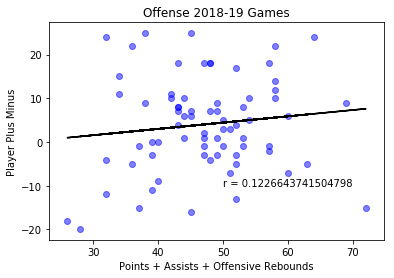

In [142]:
x = rw_merge['PTS_x']+rw_merge['AST_x']+rw_merge['OREB_x']
y = rw_merge['PLUS_MINUS_x']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
predict_y = intercept + slope * x
plt.plot(x, predict_y, 'black')
plt.scatter(x,y, color = 'blue',alpha=0.5)
plt.xlabel("Points + Assists + Offensive Rebounds")
plt.ylabel("Player Plus Minus")
plt.title("Offense 2018-19 Games")
plt.annotate(f'r = {r_value}',xy=(50,-10))
plt.savefig("RW pts+ast+oreb vs team+-.png")
plt.show()

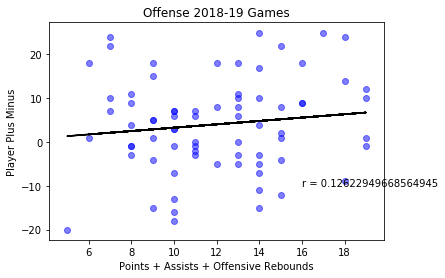

In [140]:
x = rw_merge['STL_x']+rw_merge['BLK_x']+rw_merge['DREB_x']
y = rw_merge['PLUS_MINUS_x']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
predict_y = intercept + slope * x
plt.plot(x, predict_y, 'black')
plt.scatter(x,y, color = 'blue',alpha=0.5)
plt.xlabel("Points + Assists + Offensive Rebounds")
plt.ylabel("Player Plus Minus")
plt.title("Offense 2018-19 Games")
plt.annotate(f'r = {r_value}',xy=(16,-10))
plt.savefig("RW stl+blk+dreb vs player +-.png")
plt.show()

In [39]:
RW_career = pcs.PlayerCareerStats(player_id='201566')
RW_career_df = RW_career.get_data_frames()[1]
RW_seasons_df = RW_career.get_data_frames()[0]
RW_2018_2019_df = RW_seasons_df[len(RW_seasons_df)-1:]
RW_2018_2019_df.count()

PLAYER_ID            1
SEASON_ID            1
LEAGUE_ID            1
TEAM_ID              1
TEAM_ABBREVIATION    1
PLAYER_AGE           1
GP                   1
GS                   1
MIN                  1
FGM                  1
FGA                  1
FG_PCT               1
FG3M                 1
FG3A                 1
FG3_PCT              1
FTM                  1
FTA                  1
FT_PCT               1
OREB                 1
DREB                 1
REB                  1
AST                  1
STL                  1
BLK                  1
TOV                  1
PF                   1
PTS                  1
dtype: int64

In [37]:
CP_career = pcs.PlayerCareerStats(player_id='101108')
CP_career_df = CP_career.get_data_frames()[1]
CP_seasons_df = CP_career.get_data_frames()[0]
CP_2018_2019_df = CP_seasons_df[len(CP_seasons_df)-1:]
CP_2018_2019_df

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
13,101108,2018-19,00,1610612745,HOU,34.0,58,58,1857.0,302,...,0.862,36,229,265,473,114,18,152,146,906


In [161]:
from nba_api.stats.endpoints import playerdashboardbyteamperformance
rw2 = playerdashboardbyteamperformance.PlayerDashboardByTeamPerformance(player_id = '201566').get_data_frames()[0]
rw2.to_csv("rw.csv")

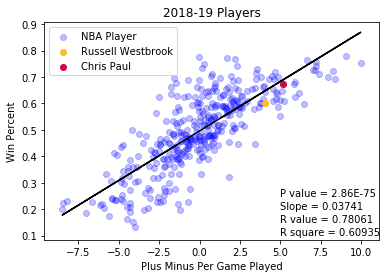

In [201]:
from nba_api.stats.endpoints import playerdashboardbygamesplits
df = leaguedashplayerstats.LeagueDashPlayerStats(season = '2018-19').get_data_frames()[0]
df = df[df['MIN'] > 500]
x = df['PLUS_MINUS']/df['GP']
y = df['W_PCT']
rw_player = df[df['PLAYER_NAME'] == 'Russell Westbrook']
cp_player = df[df['PLAYER_NAME'] == 'Chris Paul']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
predict_y = intercept + slope * x
plt.plot(x, predict_y, 'black')
plt.scatter(x,y, color = 'blue',alpha=0.25, label = 'NBA Player')
plt.scatter((rw_player['PLUS_MINUS']/rw_player['GP']),rw_player['W_PCT'], color = '#FCBB30',label = 'Russell Westbrook')
plt.scatter((cp_player['PLUS_MINUS']/cp_player['GP']),cp_player['W_PCT'], color = '#CF093F',label = 'Chris Paul')
plt.xlabel("Plus Minus Per Game Played")
plt.ylabel("Win Percent")
plt.title("2018-19 Players")
plt.legend(loc = 'best')
plt.annotate("R square = {:.5f}".format(r_value*r_value),xy=(5, .1))
plt.annotate("R value = {:.5f}".format(r_value),xy=(5, .15))
plt.annotate("Slope = {:.5f}".format(slope),xy=(5, .2))
plt.annotate("P value = {:.2E}".format(p_value),xy=(5, .25))
plt.savefig("PlusMinus vs Win%.png")
plt.show()